In [35]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import re
import string
from tensorflow.keras.layers import TextVectorization , Input,Embedding,SimpleRNN,Dense,Bidirectional,LSTM,Dropout,GRU,Conv1D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
train_ds,val_ds,test_ds = tfds.load('imdb_reviews',split=['train','test[:50%]','test[50%:]'],as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMNFSHR/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMNFSHR/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMNFSHR/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [4]:
for review,lable in train_ds.take(2):
  print(review)
  print(lable)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on t

In [5]:
def standardization(input_data):
  lower_case = tf.strings.lower(input_data)
  no_tag = tf.strings.regex_replace(lower_case , "<[^>]+>","")
  output = tf.strings.regex_replace(no_tag,"[%s]"%re.escape(string.punctuation),"")
  return output

In [6]:
standardization("<b> hi harsh?")

<tf.Tensor: shape=(), dtype=string, numpy=b' hi harsh'>

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
PorterStemmer().stem("riding")

'ride'

In [7]:
VOCAB_SIZE=10000
SEQUENCE_LENGTH=250
EMBEDDING_DIM=300

In [8]:
vectorize_layer = TextVectorization(
    standardize = standardization,
    max_tokens = VOCAB_SIZE,
    output_mode = 'int',
    output_sequence_length = SEQUENCE_LENGTH
)

In [9]:
training_data = train_ds.map(lambda x,y:x)
vectorize_layer.adapt(training_data)

In [ ]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'this',
 'i',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'are',
 'you',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'her',
 'or',
 'just',
 'about',
 'has',
 'out',
 'if',
 'some',
 'what',
 'there',
 'good',
 'more',
 'very',
 'when',
 'she',
 'even',
 'up',
 'no',
 'would',
 'my',
 'which',
 'only',
 'time',
 'really',
 'story',
 'their',
 'were',
 'had',
 'see',
 'can',
 'me',
 'than',
 'we',
 'much',
 'been',
 'get',
 'well',
 'will',
 'into',
 'because',
 'people',
 'other',
 'also',
 'do',
 'bad',
 'great',
 'how',
 'first',
 'most',
 'him',
 'dont',
 'made',
 'movies',
 'then',
 'films',
 'make',
 'could',
 'way',
 'them',
 'any',
 'too',
 'after',
 'characters',
 'think',
 'watch',
 'two',
 'many',
 'being',
 'seen',
 'character',
 'never',
 'little',
 'acting',
 'plot',
 'where',
 'best',
 '

In [ ]:
len(vectorize_layer.get_vocabulary())

10000

In [10]:
def vectorizer(review,lable):
  return vectorize_layer(review) , lable

In [ ]:
for review , lable in train_ds.take(1):
  print(review)
  print(lable)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [11]:
train_dataset = train_ds.map(vectorizer)
validation_dataset = val_ds.map(vectorizer)

In [ ]:
for review , lable in train_dataset.take(1):
  print(review)
  print(lable)

tf.Tensor(
[  10   13   33  411  384   17   89   26    1    8   32 1337 3521   40
  491    1  192   22   84  149   18   10  215  317   26   64  239  212
    8  484   54   64   84  111   95   21 5502   10   91  637  737   10
   17    7   33  393 9554  169 2443  406    2   87 1205  135   65  142
   52    2    1 7408   65  245   64 2832   16    1 2851    1    1 1415
 4969    3   39    1 1567   15 3521   13  156   18    4 1205  881 7874
    8    4   17   12   13 4037    5   98  145 1234   11  236  696   12
   48   22   91   37   10 7285  149   37 1337    1   49  396   11   95
 1148  841  140    9    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [ ]:
print(vectorize_layer.get_vocabulary()[10])

this


In [12]:
BATCH_SIZE=32
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset=validation_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for review , lable in val_dataset.take(1):
  print(review.shape)

(32, 250)


# MODELING

## Simple RNN

In [ ]:
EMBEDDING_DIM = 64

model = Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),
    SimpleRNN(32),
    Dense(1,activation='sigmoid')

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 64)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643137 (2.45 MB)
Trainable params: 643137 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics = ['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=9,
    callbacks=[model_checkpoint_callback])

Epoch 1/9
782/782 [==============================] - 192s 246ms/step - loss: 0.6807 - accuracy: 0.5656 - val_loss: 0.6972 - val_accuracy: 0.4994
Epoch 2/9
782/782 [==============================] - 190s 244ms/step - loss: 0.6400 - accuracy: 0.6622 - val_loss: 0.7131 - val_accuracy: 0.4985
Epoch 3/9
782/782 [==============================] - 187s 239ms/step - loss: 0.5570 - accuracy: 0.7662 - val_loss: 0.7390 - val_accuracy: 0.5017
Epoch 4/9
782/782 [==============================] - 188s 240ms/step - loss: 0.4655 - accuracy: 0.8336 - val_loss: 0.7721 - val_accuracy: 0.5024
Epoch 5/9
782/782 [==============================] - 190s 243ms/step - loss: 0.3981 - accuracy: 0.8678 - val_loss: 0.8025 - val_accuracy: 0.5039
Epoch 6/9
782/782 [==============================] - 189s 242ms/step - loss: 0.3351 - accuracy: 0.8981 - val_loss: 0.8350 - val_accuracy: 0.4994
Epoch 7/9
782/782 [==============================] - 190s 243ms/step - loss: 0.2981 - accuracy: 0.9111 - val_loss: 0.8694 - val_ac

[]

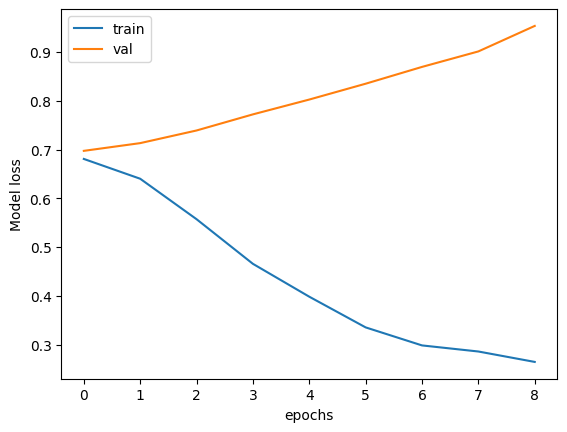

In [ ]:
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.plot()

[]

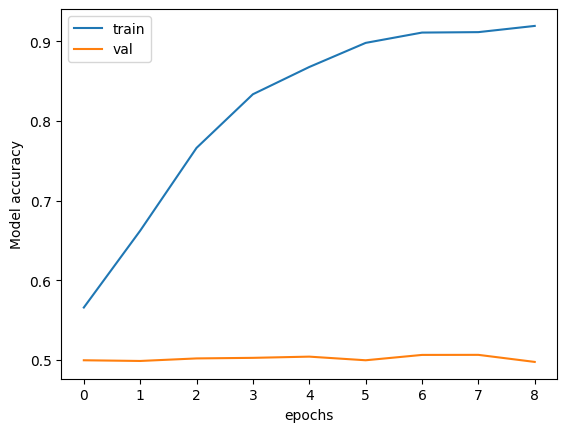

In [ ]:
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.plot()

## LSTM

In [16]:
EMBEDDING_LAYER = 64
model = Sequential([
    Input(shape = (SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_LAYER),

    Bidirectional(LSTM(64,return_sequences=True)),
    Bidirectional(LSTM(32)),

    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 250, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer = Adam(1e-4),
              metrics=['accuracy'])

In [22]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    )

Epoch 1/10
782/782 [==============================] - 112s 130ms/step - loss: 0.5322 - accuracy: 0.7034 - val_loss: 0.3614 - val_accuracy: 0.8458
Epoch 2/10
782/782 [==============================] - 41s 53ms/step - loss: 0.2894 - accuracy: 0.8900 - val_loss: 0.3210 - val_accuracy: 0.8616
Epoch 3/10
782/782 [==============================] - 39s 49ms/step - loss: 0.2197 - accuracy: 0.9236 - val_loss: 0.3568 - val_accuracy: 0.8516
Epoch 4/10
782/782 [==============================] - 41s 53ms/step - loss: 0.1821 - accuracy: 0.9408 - val_loss: 0.4255 - val_accuracy: 0.8394
Epoch 5/10
782/782 [==============================] - 38s 48ms/step - loss: 0.1650 - accuracy: 0.9474 - val_loss: 0.4549 - val_accuracy: 0.8350
Epoch 6/10
782/782 [==============================] - 43s 55ms/step - loss: 0.1566 - accuracy: 0.9495 - val_loss: 0.4376 - val_accuracy: 0.8508
Epoch 7/10
782/782 [==============================] - 42s 54ms/step - loss: 0.1323 - accuracy: 0.9588 - val_loss: 0.4867 - val_accurac

[]

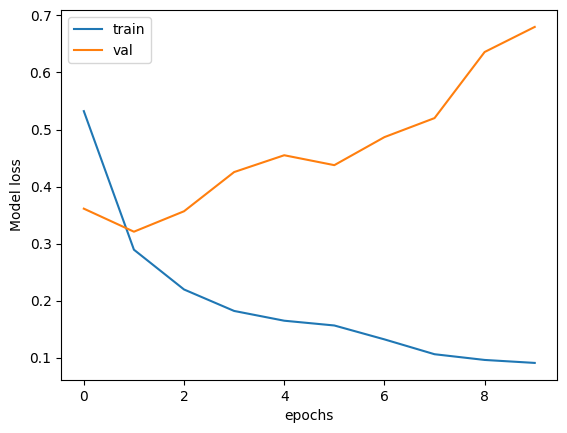

In [23]:
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.plot()

[]

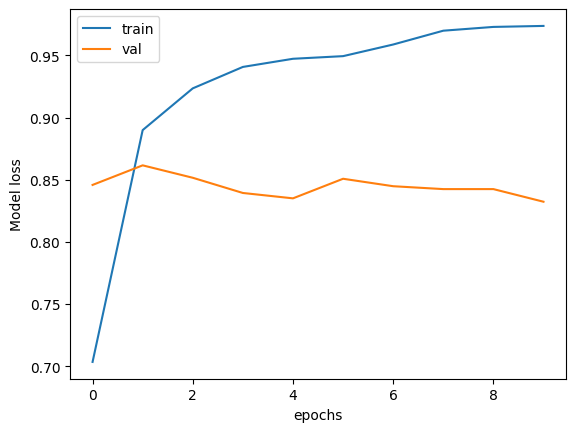

In [24]:
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'])
plt.ylabel('Model loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.plot()

In [26]:
test_dataset = test_ds.map(vectorizer)
test_dataset = test_dataset.batch(BATCH_SIZE)
model.evaluate(test_dataset)

391/391 [==============================] - 8s 20ms/step - loss: 0.6712 - accuracy: 0.8320


[0.6712332963943481, 0.8320000171661377]

## GRU

In [28]:
EMBEDDING_LAYER = 64
model = Sequential([
    Input(shape = (SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_LAYER),

    Bidirectional(GRU(64,return_sequences=True)),
    Bidirectional(GRU(32)),

    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer =Adam(1e-4),
              metrics=['accuracy'])

In [30]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    )

Epoch 1/10
782/782 [==============================] - 90s 106ms/step - loss: 0.6446 - accuracy: 0.5947 - val_loss: 0.4111 - val_accuracy: 0.8205
Epoch 2/10
782/782 [==============================] - 41s 52ms/step - loss: 0.3275 - accuracy: 0.8683 - val_loss: 0.3335 - val_accuracy: 0.8622
Epoch 3/10
782/782 [==============================] - 39s 50ms/step - loss: 0.2405 - accuracy: 0.9117 - val_loss: 0.3640 - val_accuracy: 0.8499
Epoch 4/10
782/782 [==============================] - 37s 47ms/step - loss: 0.2011 - accuracy: 0.9324 - val_loss: 0.4252 - val_accuracy: 0.8392
Epoch 5/10
782/782 [==============================] - 42s 54ms/step - loss: 0.1774 - accuracy: 0.9419 - val_loss: 0.4762 - val_accuracy: 0.8306
Epoch 6/10
782/782 [==============================] - 42s 53ms/step - loss: 0.1626 - accuracy: 0.9474 - val_loss: 0.4911 - val_accuracy: 0.8372
Epoch 7/10
782/782 [==============================] - 39s 50ms/step - loss: 0.1478 - accuracy: 0.9527 - val_loss: 0.5542 - val_accuracy

[]

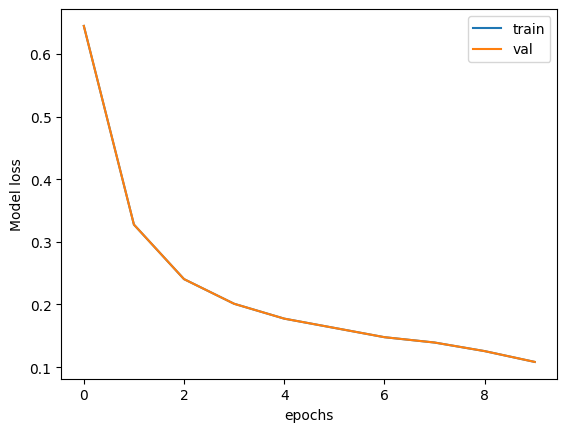

In [31]:
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.plot()

[]

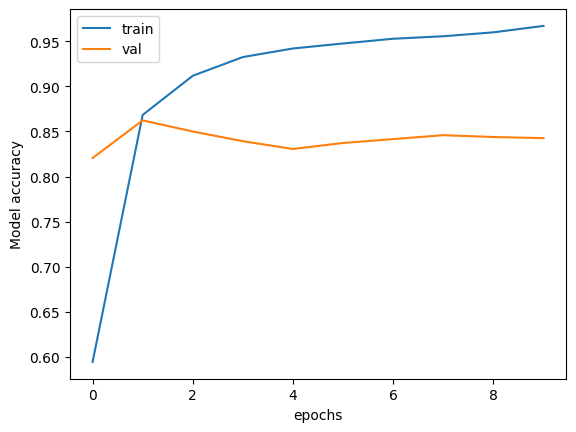

In [32]:
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'])
plt.ylabel('Model accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.plot()

In [33]:
test_dataset = test_ds.map(vectorizer)
test_dataset = test_dataset.batch(BATCH_SIZE)
model.evaluate(test_dataset)

391/391 [==============================] - 8s 21ms/step - loss: 0.5617 - accuracy: 0.8434


[0.5617462396621704, 0.8434399962425232]

## Conv1D

In [53]:
EMBEDDING_DIM=64
model = Sequential([
    Input(shape=(SEQUENCE_LENGTH,)),
    Embedding(VOCAB_SIZE,EMBEDDING_DIM),

    Conv1D(32,3,activation='relu'),
    Flatten(),

    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')


])

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 250, 64)           640000    
                                                                 
 conv1d_5 (Conv1D)           (None, 248, 32)           6176      
                                                                 
 flatten_5 (Flatten)         (None, 7936)              0         
                                                                 
 dense_14 (Dense)            (None, 32)                253984    
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 900193 (3.43 MB)
Trainable params: 90019

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(1e-4),
              metrics=['accuracy'])

In [56]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    )

Epoch 1/10
782/782 [==============================] - 47s 59ms/step - loss: 0.6924 - accuracy: 0.5180 - val_loss: 0.6876 - val_accuracy: 0.5519
Epoch 2/10
782/782 [==============================] - 14s 17ms/step - loss: 0.5043 - accuracy: 0.7597 - val_loss: 0.3450 - val_accuracy: 0.8551
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 0.2836 - accuracy: 0.8899 - val_loss: 0.3119 - val_accuracy: 0.8698
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.2220 - accuracy: 0.9181 - val_loss: 0.3200 - val_accuracy: 0.8679
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.1806 - accuracy: 0.9373 - val_loss: 0.3380 - val_accuracy: 0.8630
Epoch 6/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1500 - accuracy: 0.9530 - val_loss: 0.3818 - val_accuracy: 0.8586
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.1259 - accuracy: 0.9628 - val_loss: 0.4115 - val_accuracy:

[]

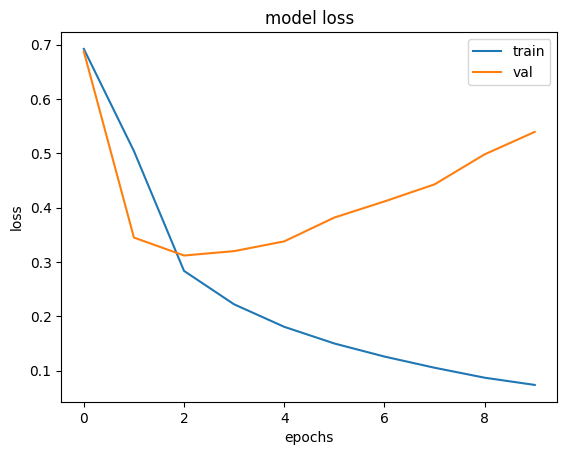

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('model loss')
plt.legend(['train','val'])
plt.plot()

[]

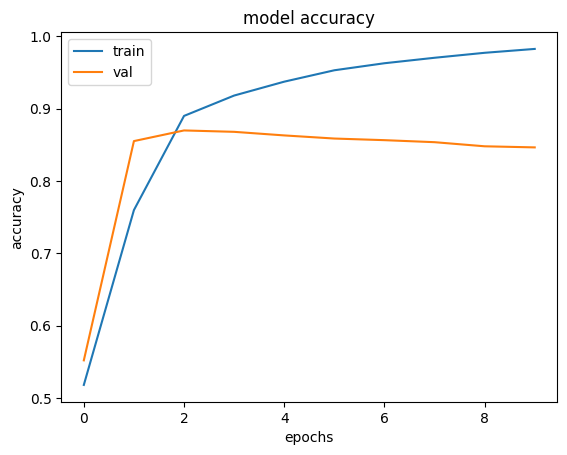

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('model accuracy')
plt.legend(['train','val'])
plt.plot()

In [60]:
model.evaluate(test_dataset)

391/391 [==============================] - 4s 10ms/step - loss: 0.5391 - accuracy: 0.8457


[0.5391454696655273, 0.8456799983978271]